Diabetes Prediction Using Decision Tree

We will build a decision tree to predict diabetes for subjects in the Pima Indians dataset based on predictor variables such as age, blood pressure, and bmi. 

<center><img src='https://i.imgur.com/6Fam41M.png'></center>

A subset of the **Pima Indians data** from the UCI Machine Learning Repository is a built-in dataset in the MASS library. The Pima data in MASS contains 768 complete records from the original dataset. 

These **768 records** have been broken down into two dataframes: Train dataframe has 80% and Test dataframe has 20% of total subjects. All records with zeros that don’t make sense have been cleaned out of these datasets.

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It’s visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In [1]:
# Load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ubaid-shah/datasets/main/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [6]:
data.columns = col_names

In [7]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#split dataset in features and target variable

X = data.drop(columns = 'label') # Features
y = data['label'] # Target variable

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
X_train.shape

(614, 8)

In [11]:
X_train.isna().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
dtype: int64

In [12]:
X_test.shape

(154, 8)

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [14]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [15]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [16]:
clf.score(X_train,y_train)

1.0

In [17]:
clf.score(X_test,y_test)

0.6948051948051948

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6948051948051948


In [19]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       104
           1       0.53      0.58      0.55        50

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.69      0.70       154



In [20]:
print(clf)

DecisionTreeClassifier()


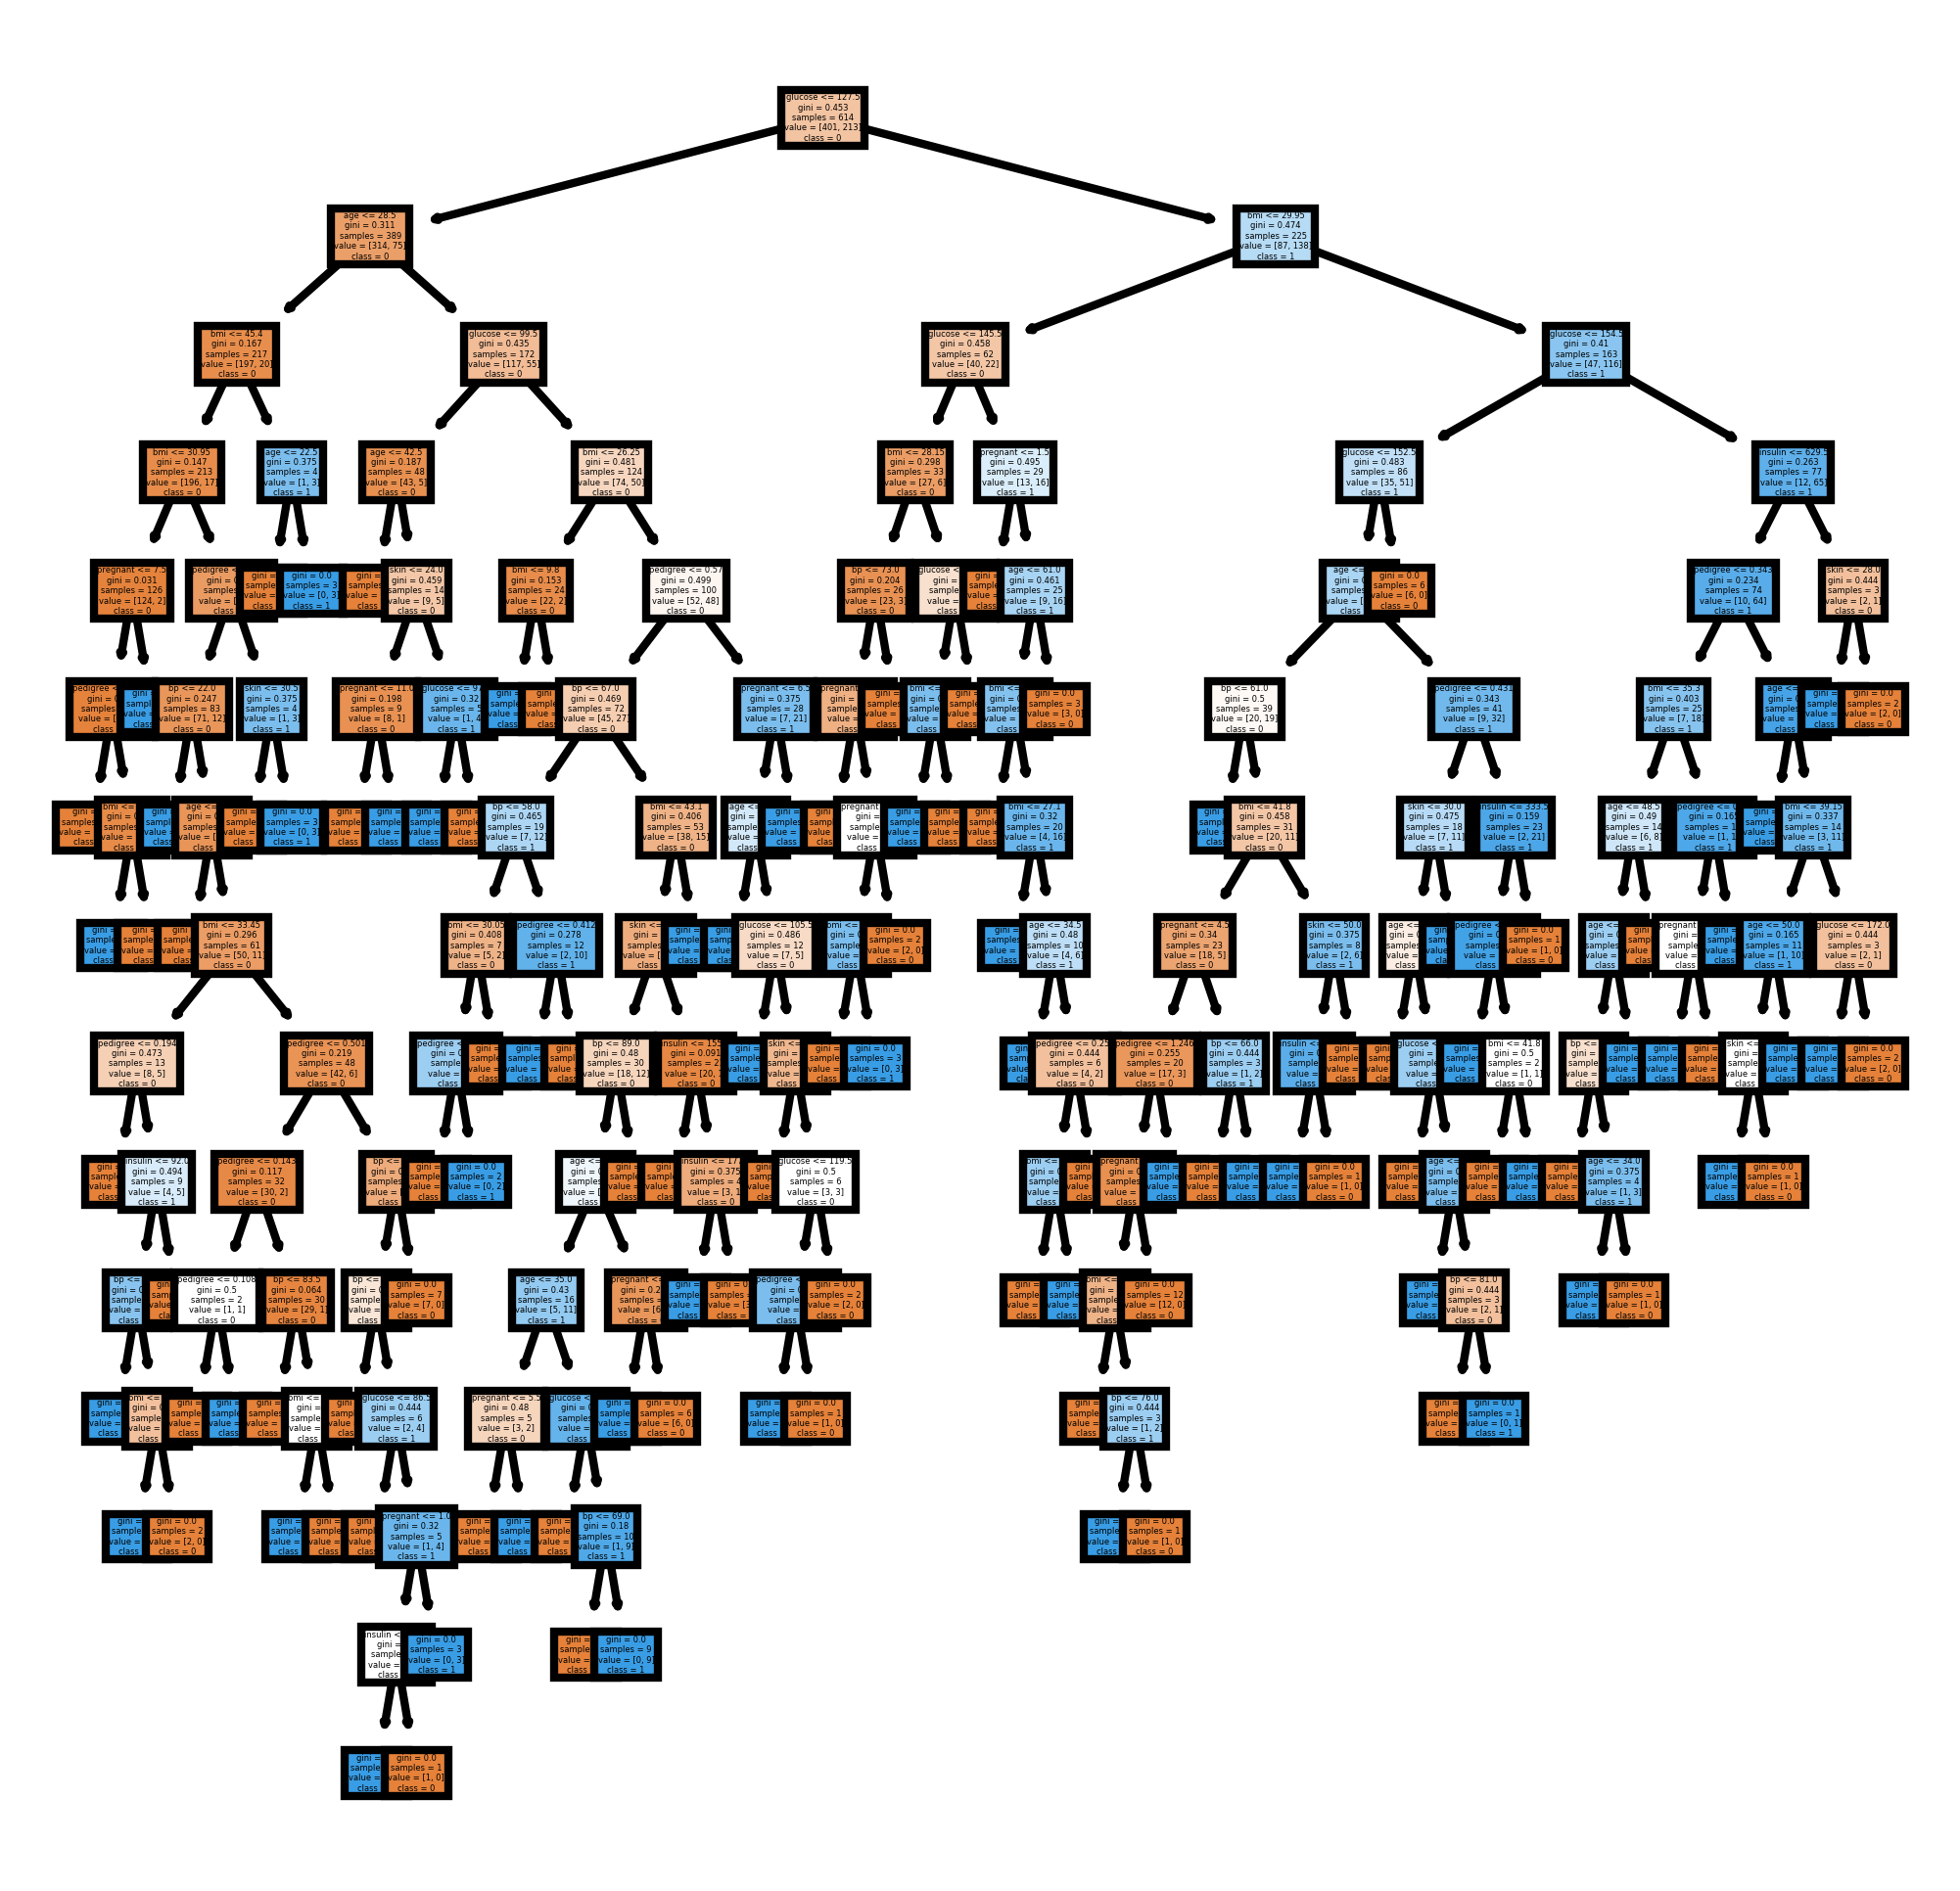

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = col_names, 
               class_names=['0','1'],
               filled = True);

fig.savefig('imagename.png')

# Tree Optimization 

In [22]:
parameterstree = DecisionTreeClassifier(criterion = "entropy", 
                                        splitter = "random", 
                                        max_depth = 2,  
                                        min_samples_split = 5,
                                        min_samples_leaf = 5, 
                                        max_features = 5,
                                       random_state=206)

In [23]:
parameterstree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=5,
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=206, splitter='random')

In [24]:
y_pred_param = parameterstree.predict(X_test)

In [25]:
parameterstree.score(X_train,y_train)

0.739413680781759

In [26]:
parameterstree.score(X_test,y_test)

0.7207792207792207

In [27]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


In [28]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



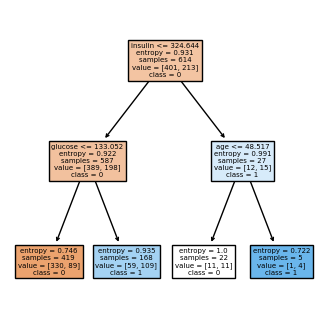

In [29]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(parameterstree,
               feature_names = col_names, 
               class_names=['0','1'],
               filled = True);

## Model With Gini Index

In [30]:
parameterstree = DecisionTreeClassifier(criterion = "gini", 
                                        splitter = "random", 
                                        max_depth = 2,  
                                        min_samples_split = 5,
                                        min_samples_leaf = 5, 
                                        max_features = 5,
                                       random_state=206)

In [31]:
parameterstree.fit(X_train,y_train)
y_pred_param = parameterstree.predict(X_test)
parameterstree.score(X_train,y_train)

0.739413680781759

In [32]:
parameterstree.score(X_test,y_test)

0.7207792207792207

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_param))

Accuracy: 0.7207792207792207


In [34]:
print(metrics.classification_report(y_pred_param,y_test))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       112
           1       0.49      0.64      0.56        42

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.75      0.72      0.73       154



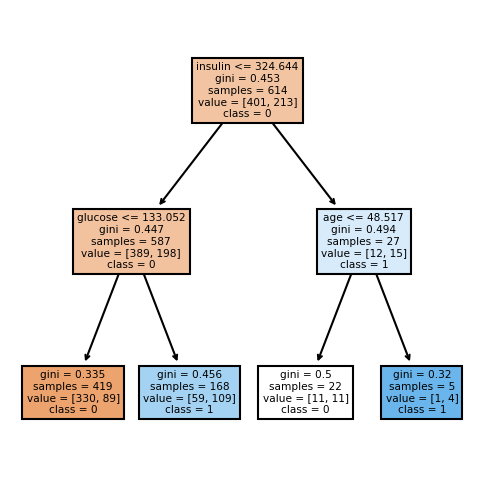

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(parameterstree,
               feature_names = col_names, 
               class_names=['0','1'],
               filled = True);